<a href="https://colab.research.google.com/github/AntanVino/Final-Year-Project/blob/main/LUNG_CANCER_DETECTION_USING_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

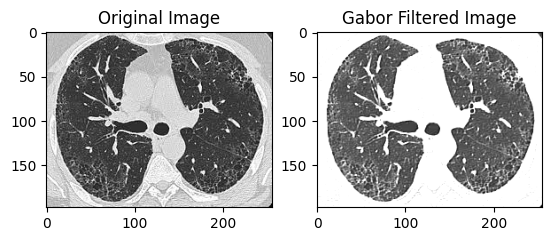

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gabor_filter(image, frequency, theta, sigma_x, sigma_y):
    kernel = cv2.getGaborKernel(
        (21, 21),
        sigma_x,
        theta,
        frequency,
        sigma_y,
        0,
        ktype=cv2.CV_32F
    )

    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)
    cv2.normalize(filtered_image, filtered_image, 0, 255, cv2.NORM_MINMAX)

    return filtered_image

# Read an example image
image = cv2.imread("images.jpeg", cv2.IMREAD_GRAYSCALE)

# Set adjusted Gabor filter parameters
frequency = 5
theta = np.pi/6
sigma_x = 1
sigma_y = 2

# Apply Gabor filter
filtered_image = apply_gabor_filter(image, frequency, theta, sigma_x, sigma_y)

# Display original and filtered images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Gabor Filtered Image')
plt.imshow(filtered_image, cmap='gray')

plt.show()

cv2.imwrite("gabor_filtered_image.png", filtered_image)


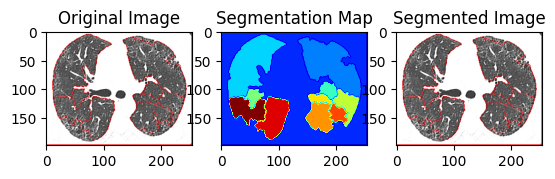

True

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('gabor_filtered_image.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that sure background is not 0 but 1
markers = markers + 1

# Mark the region of unknown with 0
markers[unknown == 255] = 0

# Apply watershed algorithm
cv2.watershed(image, markers)

# Mark segmented regions on the original image
image[markers == -1] = [0, 0, 255]  # Watershed boundaries are marked in red

# Display the results
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(132), plt.imshow(markers, cmap='jet'), plt.title('Segmentation Map')
plt.subplot(133), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image')
plt.show()

cv2.imwrite("segmented_image.png", image)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('segmented_image.png')

# Check if the image is loaded successfully
if image is None:
    print("Error: Image not loaded.")
    exit()

# Create an image with a light blue background
height, width, _ = image.shape
light_blue_background = np.ones((height, width, 3), dtype=np.uint8) * [173, 216, 230]  # RGB values for light blue

# Convert the original image to the same data type as the background
image = image.astype(np.uint8)

# Overlay the original image on the light blue background
result_image = cv2.addWeighted(image, 0.7, light_blue_background.astype(np.uint8), 0.3, 0)

# Display the results
plt.subplot(133), plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)), plt.title('Segmented Image')
plt.show()


cv2.imwrite("segmented1_image.png", result_image)

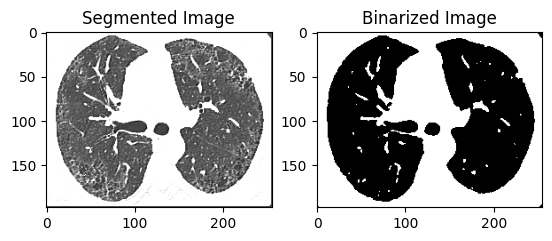

White Pixels: 24164
Black Pixels: 26326
Result : No Potential presence of lung cancer.


In [ ]:
import cv2
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('segmented_image.png', cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to reduce noise and improve Otsu's thresholding
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu's thresholding
_, binary_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Count white and black pixels in the binarized image
white_pixel_count = cv2.countNonZero(binary_image)
black_pixel_count = binary_image.size - white_pixel_count

# Display the original and binarized images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Segmented Image')
plt.subplot(122), plt.imshow(binary_image, cmap='gray'), plt.title('Binarized Image')
plt.show()

# Print the results
print(f'White Pixels: {white_pixel_count}')
print(f'Black Pixels: {black_pixel_count}')

# Check for lung cancer based on pixel counts
if black_pixel_count > white_pixel_count:
    print('Result : No Potential presence of lung cancer.')
else:
    print('Result : indication of lung cancer.')